<a href="https://colab.research.google.com/github/shielamms/Tensorflow-Notebooks/blob/main/Text_Preprocessing_for_Sentiment_Analysis_in_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sample text preprocessing

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
sentences = [
    'I have a dog',
    'She has a wonderful cat!',
    'You, do you have a pet?',
    'The dog jumps over the moon'
]

In [3]:
tokenizer = Tokenizer(
    num_words=100,
    lower=True,
    oov_token='<OOV>'
)

tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)

print('Word index:', word_index)
print('Sequences:', sequences)

Word index: {'<OOV>': 1, 'a': 2, 'have': 3, 'dog': 4, 'you': 5, 'the': 6, 'i': 7, 'she': 8, 'has': 9, 'wonderful': 10, 'cat': 11, 'do': 12, 'pet': 13, 'jumps': 14, 'over': 15, 'moon': 16}
Sequences: [[7, 3, 2, 4], [8, 9, 2, 10, 11], [5, 12, 5, 3, 2, 13], [6, 4, 14, 15, 6, 16]]


In [4]:
padded_sequences = pad_sequences(sequences, maxlen=5)
padded_sequences

array([[ 0,  7,  3,  2,  4],
       [ 8,  9,  2, 10, 11],
       [12,  5,  3,  2, 13],
       [ 4, 14, 15,  6, 16]], dtype=int32)

In [5]:
tokenizer.texts_to_sequences(['Hello there dog!!'])

[[1, 1, 4]]

# Sarcasm Detection

In [6]:
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json


--2023-03-31 12:55:46--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 74.125.204.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2023-03-31 12:55:46 (113 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [16]:
import json

with open('./sarcasm.json', 'r') as file:
  data = json.load(file)

In [17]:
data[0]

{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
 'is_sarcastic': 0}

In [29]:
data[1030]

{'article_link': 'https://www.theonion.com/4-hours-scrolling-through-facebook-before-bed-referred-1819578025',
 'headline': "4 hours scrolling through facebook before bed referred to as 'winding down'",
 'is_sarcastic': 1}

In [36]:
sentences = []
labels = []
urls = []

In [37]:
for entry in data:
  sentences.append(entry.get('headline'))
  labels.append(entry.get('is_sarcastic'))
  urls.append(entry.get('article_link'))

In [38]:
len(sentences)

26709

### Train-test split

In [39]:
train_split = 0.8
train_size = int(train_split * len(sentences))

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]
test_sentences = sentences[train_size:]
test_labels = labels[train_size:]

In [40]:
print('Train size:', len(train_sentences))
print('Test size:', len(test_sentences))

Train size: 21367
Test size: 5342


In [41]:
# Preprocessing
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

oov_token = '<OOV>'
max_sequence_len = 32
padding_type = 'post'
truncate_type = 'post'
max_vocab = 10000
embedding_dims = 16

tokenizer = Tokenizer(oov_token=oov_token, num_words=max_vocab)

tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
print('Word index size:', len(word_index))

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences,
                             maxlen=max_sequence_len,
                             padding=padding_type,
                             truncating=truncate_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences,
                            maxlen=max_sequence_len,
                            padding=padding_type,
                            truncating=truncate_type)

# convert data as numpy arrays
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

Word index size: 26507


In [42]:
print('Train size:', len(train_padded))
print('Test size:', len(test_padded))

Train size: 21367
Test size: 5342


## Training the model

In [43]:
import tensorflow as tf

gap1d_layer = tf.keras.layers.GlobalAveragePooling1D()

# Define sample array
sample_array = np.array([[[10,2],[1,3],[1,1]]])

# Print shape and contents of sample array
print(f'shape of sample_array = {sample_array.shape}')
print(f'sample array: {sample_array}')

# Pass the sample array to the GAP1D layer
output = gap1d_layer(sample_array)

# Print shape and contents of the GAP1D output array
print(f'output shape of gap1d_layer: {output.shape}')
print(f'output array of gap1d_layer: {output.numpy()}')

shape of sample_array = (1, 3, 2)
sample array: [[[10  2]
  [ 1  3]
  [ 1  1]]]
output shape of gap1d_layer: (1, 2)
output array of gap1d_layer: [[4 2]]


In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab, embedding_dims, input_length=max_sequence_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 16)            160000    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
EPOCHS = 20

history = model.fit(train_padded,
                    train_labels,
                    epochs=EPOCHS,
                    validation_data=(test_padded, test_labels),
                    verbose=2)

Epoch 1/20
668/668 - 4s - loss: 0.5791 - accuracy: 0.6902 - val_loss: 0.4088 - val_accuracy: 0.8122 - 4s/epoch - 6ms/step
Epoch 2/20
668/668 - 4s - loss: 0.3170 - accuracy: 0.8709 - val_loss: 0.3482 - val_accuracy: 0.8450 - 4s/epoch - 6ms/step
Epoch 3/20
668/668 - 3s - loss: 0.2399 - accuracy: 0.9064 - val_loss: 0.3410 - val_accuracy: 0.8529 - 3s/epoch - 4ms/step
Epoch 4/20
668/668 - 3s - loss: 0.1968 - accuracy: 0.9249 - val_loss: 0.3563 - val_accuracy: 0.8516 - 3s/epoch - 4ms/step
Epoch 5/20
668/668 - 3s - loss: 0.1649 - accuracy: 0.9406 - val_loss: 0.3976 - val_accuracy: 0.8401 - 3s/epoch - 4ms/step
Epoch 6/20
668/668 - 5s - loss: 0.1427 - accuracy: 0.9490 - val_loss: 0.4184 - val_accuracy: 0.8403 - 5s/epoch - 7ms/step
Epoch 7/20
668/668 - 3s - loss: 0.1248 - accuracy: 0.9561 - val_loss: 0.4398 - val_accuracy: 0.8424 - 3s/epoch - 5ms/step
Epoch 8/20
668/668 - 3s - loss: 0.1089 - accuracy: 0.9628 - val_loss: 0.4899 - val_accuracy: 0.8371 - 3s/epoch - 5ms/step
Epoch 9/20
668/668 - 3s 

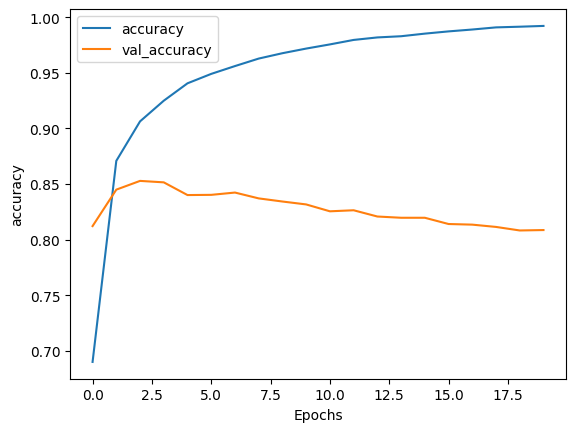

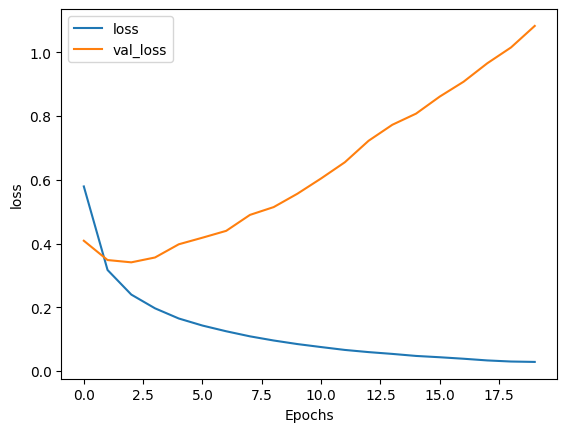

In [48]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Visualise the word embeddings

In [49]:
# Get the index-word dictionary
reverse_word_index = tokenizer.index_word

# Get the embedding layer from the model (i.e. first layer)
embedding_layer = model.layers[0]

# Get the weights of the embedding layer
embedding_weights = embedding_layer.get_weights()[0]

# Print the shape. Expected is (vocab_size, embedding_dim)
print(embedding_weights.shape) 

(10000, 16)


In [51]:
import io

# Open writeable files
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

# Initialize the loop. Start counting at `1` because `0` is just for the padding
for word_num in range(1, max_vocab):

  # Get the word associated at the current index
  word_name = reverse_word_index[word_num]

  # Get the embedding weights associated with the current index
  word_embedding = embedding_weights[word_num]

  # Write the word name
  out_m.write(word_name + "\n")

  # Write the word embedding
  out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")

# Close the files
out_v.close()
out_m.close()

In [52]:
# Import files utilities in Colab
try:
  from google.colab import files
except ImportError:
  pass

# Download the files
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>